In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('LoanStats3a_securev1.csv', low_memory=False, encoding='latin-1')
df = df.drop(columns=['id', 'member_id'])

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_using = df[['int_rate', 'loan_amnt', 'term', 'home_ownership', 'annual_inc', 'fico_range_low', 'fico_range_high']]

df_using = df_using.dropna()

In [4]:
df_using['fico_range_average']= (df_using['fico_range_low'] + df_using['fico_range_high'])/2

In [5]:
df_using.head()

,int_rate,loan_amnt,term,home_ownership,annual_inc,fico_range_low,fico_range_high,fico_range_average
0,10.65%,5000.0,36 months,RENT,24000.0,735.0,739.0,737.0
1,15.27%,2500.0,60 months,RENT,30000.0,740.0,744.0,742.0
2,15.96%,2400.0,36 months,RENT,12252.0,735.0,739.0,737.0
3,13.49%,10000.0,36 months,RENT,49200.0,690.0,694.0,692.0
4,12.69%,3000.0,60 months,RENT,80000.0,695.0,699.0,697.0


In [6]:
df_using['home_ownership'].value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            4
Name: home_ownership, dtype: int64

In [7]:
df_using.dtypes

int_rate               object
loan_amnt             float64
term                   object
home_ownership         object
annual_inc            float64
fico_range_low        float64
fico_range_high       float64
fico_range_average    float64
dtype: object

In [8]:
df_using["int_rate"] = df_using["int_rate"].str.replace('%', '')
df_using["int_rate"] = df_using["int_rate"].astype(float)

In [9]:
df_using.dtypes

int_rate              float64
loan_amnt             float64
term                   object
home_ownership         object
annual_inc            float64
fico_range_low        float64
fico_range_high       float64
fico_range_average    float64
dtype: object

In [10]:
df_using["term"] = df_using["term"].str.replace(' months', '')
df_using["term"] = df_using["term"].astype(float)

In [11]:
df_using.dtypes

int_rate              float64
loan_amnt             float64
term                  float64
home_ownership         object
annual_inc            float64
fico_range_low        float64
fico_range_high       float64
fico_range_average    float64
dtype: object

In [12]:
df_using = df_using[['int_rate', 'loan_amnt', 'term', 'home_ownership', 'annual_inc', 'fico_range_average']]


In [13]:
df_using.head()

,int_rate,loan_amnt,term,home_ownership,annual_inc,fico_range_average
0,10.65,5000.0,36.0,RENT,24000.0,737.0
1,15.27,2500.0,60.0,RENT,30000.0,742.0
2,15.96,2400.0,36.0,RENT,12252.0,737.0
3,13.49,10000.0,36.0,RENT,49200.0,692.0
4,12.69,3000.0,60.0,RENT,80000.0,697.0


In [14]:
df_using['home_ownership'].value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            4
Name: home_ownership, dtype: int64

In [15]:
df_using = df_using.loc[(df_using['home_ownership'] == "RENT")|(df_using['home_ownership'] == "MORTGAGE")|(df_using['home_ownership'] == "OWN"), :]

In [16]:
df_using['home_ownership'].value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
Name: home_ownership, dtype: int64

In [17]:
df_using.dtypes

int_rate              float64
loan_amnt             float64
term                  float64
home_ownership         object
annual_inc            float64
fico_range_average    float64
dtype: object

In [18]:
df_using = pd.get_dummies(df_using)
df_using.head()

,int_rate,loan_amnt,term,annual_inc,fico_range_average,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
0,10.65,5000.0,36.0,24000.0,737.0,0,0,1
1,15.27,2500.0,60.0,30000.0,742.0,0,0,1
2,15.96,2400.0,36.0,12252.0,737.0,0,0,1
3,13.49,10000.0,36.0,49200.0,692.0,0,0,1
4,12.69,3000.0,60.0,80000.0,697.0,0,0,1


In [19]:
df_using.columns


Index(['int_rate', 'loan_amnt', 'term', 'annual_inc', 'fico_range_average',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT'],
      dtype='object')

In [20]:
X = df_using[['loan_amnt','term', 'annual_inc', 'fico_range_average',
      'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT']]

y = df_using['int_rate'].values.reshape(-1,1)
print (X.shape, y.shape)

(42391, 7) (42391, 1)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [23]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
X_train_scaled[0]

array([-0.21784849, -0.59327323, -0.13060989, -1.18771671, -0.90379571,
       -0.28639172,  1.0521557 ])

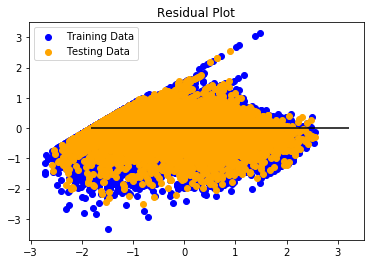

In [26]:
prediction = model.predict(X_test_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2581507054268003, R2: 0.7396379303621636


#a customer has 
- 'loan_amnt', 10000
- 'term', 36
- 'annual_inc', 100000 
- 'fico_range_average', 750
- 'home_ownership_MORTGAGE', 0
- 'home_ownership_OWN', 0
- 'home_ownership_RENT' 1

In [29]:
scaled_int_rate = model.predict(X_scaler.transform([[10000, 36, 100000, 750, 0, 0, 1]]))

In [30]:
unscaled_int_rate = y_scaler.inverse_transform(scaled_int_rate)

In [31]:
unscaled_int_rate

array([[8.7440224]])

In [42]:
import pickle


# save the model to disk
filename = 'model.h5'
pickle.dump(model, open(filename, 'wb'))

In [50]:
pickle.dump(X_scaler, open('transform.h5', 'wb'))

In [49]:
# Loading model to compare the results
model = pickle.load(open('model.h5','rb'))
print( y_scaler.inverse_transform(model.predict(X_scaler.transform([[10000, 36, 100000, 750, 0, 0, 1]])))[0][0])

8.7440224000548


In [32]:
print("hello, we help calculate your interest")

print('*'* 50)

loan_amnt = input('how much do you like: ')
loan_amnt = float(loan_amnt)

term = input('how many month type 36 or 60: ')
term = float(term)

annual_inc = input('what is your annual income: ')
annual_inc = float(annual_inc)

fico_range_average = input('what is your fico score: ')
fico_range_average = float(fico_range_average)

home_ownership = input('type mortgage, own, or rent')
mortgage = 0
own = 0
rent = 0

if home_ownership == 'own':
    own = 1
elif home_ownership == 'rent':
    rent = 1
elif home_ownership == 'mortgage':
    mortgage = 1
else: 
    print("error")

hello, we help calculate your interest
**************************************************
how much do you like: 20000
how many month type 36 or 60: 36
what is your annual income: 100000
what is your fico score: 700
type mortgage, own, or rentmortgage


In [33]:
print(loan_amnt)
print(term)
print(annual_inc)
print(fico_range_average)
print(own)
print(rent)
print(mortgage)

20000.0
36.0
100000.0
700.0
0
0
1


In [34]:
scaled_int_rate = model.predict(X_scaler.transform([[loan_amnt, term, annual_inc, fico_range_average, mortgage, own, rent]]))

In [51]:
[loan_amnt, term, annual_inc, fico_range_average, mortgage, own, rent]


[20000.0, 36.0, 100000.0, 700.0, 1, 0, 0]

In [35]:
unscaled_int_rate = y_scaler.inverse_transform(scaled_int_rate)

In [36]:
unscaled_int_rate

array([[13.70052441]])

In [37]:
interest_rate = unscaled_int_rate[0][0]
interest_rate

13.700524414071772

In [38]:
print(f'we can give you iterest rate of {interest_rate}')

we can give you iterest rate of 13.700524414071772


## Different Models

In [39]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.25904829619885883, R2: 0.7387326506701535


In [40]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.25815070754169256, R2: 0.739637928229155


In [41]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2585709661286274, R2: 0.7392140696334694
